In [ ]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training images shape:", x_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing images shape:", x_test.shape)
print("Testing labels shape:", y_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Testing images shape: (10000, 32, 32, 3)
Testing labels shape: (10000, 1)


In [ ]:
# Normalize images (0–255 → 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

print("After normalization:")
print("Min value:", x_train.min())
print("Max value:", x_train.max())


After normalization:
Min value: 0.0
Max value: 1.0


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

datagen.fit(x_train)

print("Data augmentation is ready")


Data augmentation is ready


In [ ]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet'
)

# Freeze the base model
base_model.trainable = False

print("Pretrained MobileNetV2 loaded and frozen")


/tmp/ipython-input-1571569644.py:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Pretrained MobileNetV2 loaded and frozen


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

print("Final model built successfully")


Final model built successfully


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 1, 1, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully")


Model compiled successfully


In [ ]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 98ms/step - accuracy: 0.3510 - loss: 1.7981 - val_accuracy: 0.3536 - val_loss: 1.7983
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 82s 99ms/step - accuracy: 0.3400 - loss: 1.8115 - val_accuracy: 0.3457 - val_loss: 1.8077
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3448 - loss: 1.7991 - val_accuracy: 0.3516 - val_loss: 1.7954
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3491 - loss: 1.7925 - val_accuracy: 0.3519 - val_loss: 1.7982
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3472 - loss: 1.8001 - val_accuracy: 0.3510 - val_loss: 1.7880
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.3451 - loss: 1.7970 - val_accuracy: 0.3582 - val_loss: 1.7903
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 97ms/step - accuracy: 0.3473 - loss: 1.7941 - val_accuracy: 0.3589 - val_loss: 1.7830
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 98ms/step - accuracy: 0.3563 - loss: 1.7813 - 

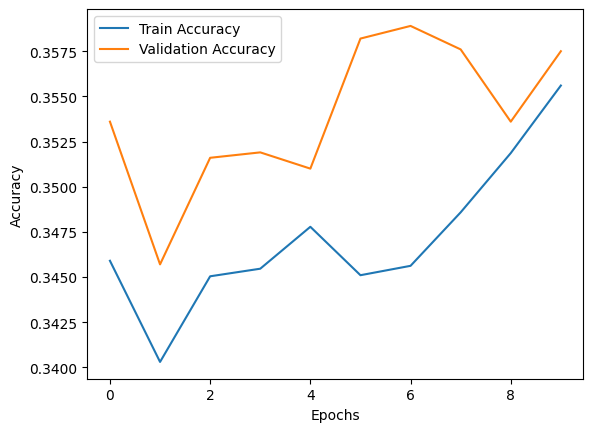

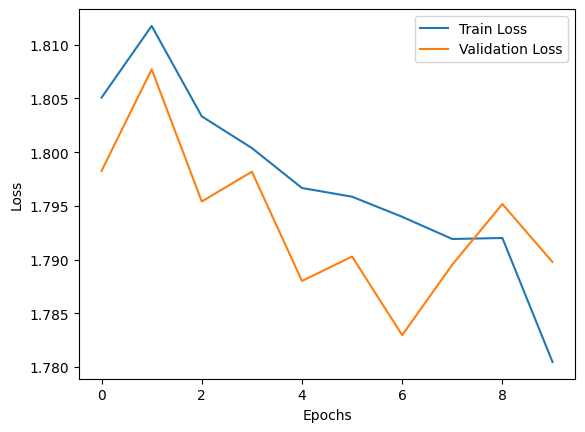

In [ ]:
import matplotlib.pyplot as plt

# Accuracy graph
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss graph
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.3565 - loss: 1.7939
Test Accuracy: 0.35749998688697815


In [ ]:
model.save("image_classifier_model.h5")
print("Model saved successfully")


Model saved successfully


In [ ]:
import numpy as np

img = x_test[0]
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
class_id = np.argmax(prediction)
confidence = np.max(prediction)

print("Predicted class ID:", class_id)
print("Confidence:", confidence)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class ID: 9
Confidence: 0.5101318


In [ ]:
from google.colab import files

uploaded = files.upload()  # then select both files from your computer


Saving dog 32 pics.jpeg to dog 32 pics.jpeg


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

# Load the trained model
model = load_model("image_classifier_model.h5")

# Upload image(s) to test
uploaded = files.upload()

for fn in uploaded.keys():
    # Load the image at the correct size your model expects (32x32)
    img = image.load_img(fn, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.0  # normalize

    # Make prediction
    preds = model.predict(x)

    # Get predicted class and confidence
    class_idx = np.argmax(preds)
    confidence = np.max(preds) * 100

    print(f"Predicted Class: {class_idx}, Confidence: {confidence:.2f}%")


Saving dog 32 pics.jpeg to dog 32 pics (2).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: 4, Confidence: 39.96%
